In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

## References
## https://github.com/MedMNIST/MedMNIST/blob/main/medmnist/dataset.py



In [2]:
mycwd = os.getcwd()
# print(mycwd)
os.chdir("../..")
path_datasets_filename = os.getcwd()+'/datasets/MedMNISTv2/retinamnist.npz' 
#Task: Ordinal Regression (5)
#Number of Samples: 1,600 (1,080 / 120 / 400)
print(path_datasets_filename)

/home/mxochicale/repositories/mxochicale/diffusion-models-tutorials/datasets/MedMNISTv2/retinamnist.npz


In [14]:
npz_file = np.load(path_datasets_filename)

print(type(npz_file)) #lib.npyio.NpzFile
print(npz_file.keys())#KeysView(<numpy.lib.npyio.NpzFile object at 0x7f5ac597d9f0>)

train_imgs = npz_file['train_images']
train_labels = npz_file['train_labels']
#             self.imgs = npz_file['val_images']
#             self.labels = npz_file['val_labels']
#             self.imgs = npz_file['test_images']
#             self.labels = npz_file['test_labels']

print(train_imgs.shape)#(1080, 28, 28, 3)
print(train_labels.shape)#(1080, 1)
print(train_imgs.dtype) #uint8
length_samples = train_imgs.shape[0]



<class 'numpy.lib.npyio.NpzFile'>
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f8849953e80>)
(1080, 28, 28, 3)
(1080, 1)
uint8


In [15]:

imagesTensor = torch.tensor(train_imgs)

print(type(imagesTensor))#<class 'torch.Tensor'>
print(imagesTensor.shape)#torch.Size([1080, 28, 28, 3])
imagesTensor = torch.permute(imagesTensor, (0, 3, 1, 2))
print(imagesTensor.shape)#torch.Size([1080, 28, 28, 3])

#####Transforms
#toTensor = torchvision.transforms.ToTensor()
#toPILImage = torchvision.transforms.ToPILImage()
# toResize = torchvision.transforms.Resize(image_size)
# toCenterCrop = torchvision.transforms.CenterCrop(image_size)
#toGraysacle = torchvision.transforms.Grayscale()


def scaleImage(x):
    #print(type(x)) #<class 'torch.Tensor'>
    #print(x.shape) #torch.Size([28, 28])

    if(x.min() < x.max()):  # Assuming the image isn't empty, rescale so its values run from 0 to 1
        x = (x - x.min())/(x.max() - x.min()) 
    z = x - x.mean()        # Subtract the mean value of the image
#     y = toTensor(y)
#     #y = toResize(y)
#     #y = toCenterCrop(y)
    
    return z

imageTensorX = torch.stack( [ scaleImage(x) for x in imagesTensor]  )
print(imageTensorX.shape)
print(type(imageTensorX))
print(imageTensorX.dtype)

#print(imageTensorX[0]) #tensor([[[-0.2927, -0.2808, -0.2808,  ..., -0.3046, -0.3046, -0.3046],

<class 'torch.Tensor'>
torch.Size([1080, 28, 28, 3])
torch.Size([1080, 3, 28, 28])
torch.Size([1080, 3, 28, 28])
<class 'torch.Tensor'>
torch.float32


In [24]:

batch_class00 = []
batch_class01 = []
batch_class02 = []
batch_class03 = []
batch_class04 = []

for idx in  range(0, length_samples):
    if train_labels[idx]==0:
        batch_class00.append(imageTensorX[idx])
    elif train_labels[idx]==1:
        batch_class01.append(imageTensorX[idx])
    elif train_labels[idx]==2:
        batch_class02.append(imageTensorX[idx])        
    elif train_labels[idx]==3:
        batch_class03.append(imageTensorX[idx])        
    elif train_labels[idx]==4:
        batch_class04.append(imageTensorX[idx])        
    else:
        print('no class')

batch_class00 = torch.stack(batch_class00, 0)
batch_class01 = torch.stack(batch_class01, 0)
batch_class02 = torch.stack(batch_class02, 0)
batch_class03 = torch.stack(batch_class03, 0)
batch_class04 = torch.stack(batch_class04, 0)

print(f' batch_class00.shape {batch_class00.shape}')
print(f' batch_class01.shape {batch_class01.shape}')
print(f' batch_class02.shape {batch_class02.shape}')
print(f' batch_class03.shape {batch_class03.shape}')
print(f' batch_class04.shape {batch_class04.shape}')
486+128+206+194+66

 batch_class00.shape torch.Size([486, 3, 28, 28])
 batch_class01.shape torch.Size([128, 3, 28, 28])
 batch_class02.shape torch.Size([206, 3, 28, 28])
 batch_class03.shape torch.Size([194, 3, 28, 28])
 batch_class04.shape torch.Size([66, 3, 28, 28])


1080

In [34]:
BATCH_SIZE=3
BATCHES_SIZE=length_samples/BATCH_SIZE
dataloader = DataLoader(batch_class00, batch_size=BATCH_SIZE, shuffle=True)
print(f'BATCHES_SIZE {BATCHES_SIZE} or len(dataloader) {len(dataloader)}')


BATCHES_SIZE 360.0 or len(dataloader) 162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 0; sampled images in the batch: 0 of 1080
    img.shape: torch.Size([3, 3, 28, 28])
    grid_img.shape: torch.Size([3, 32, 92])


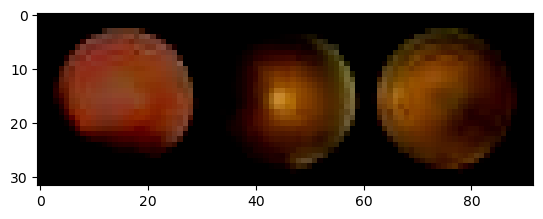

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 50; sampled images in the batch: 150 of 1080
    img.shape: torch.Size([3, 3, 28, 28])
    grid_img.shape: torch.Size([3, 32, 92])


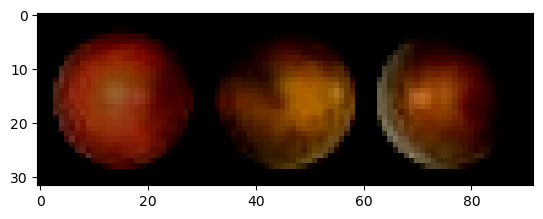

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 100; sampled images in the batch: 300 of 1080
    img.shape: torch.Size([3, 3, 28, 28])
    grid_img.shape: torch.Size([3, 32, 92])


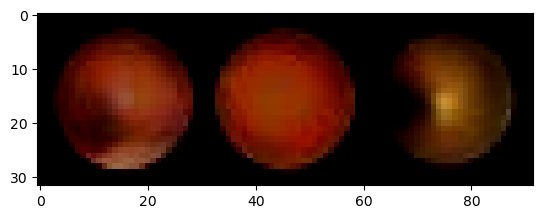

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 150; sampled images in the batch: 450 of 1080
    img.shape: torch.Size([3, 3, 28, 28])
    grid_img.shape: torch.Size([3, 32, 92])


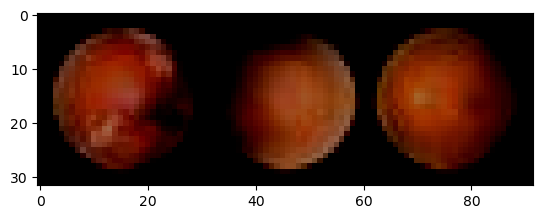

In [35]:
## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, batch in enumerate(dataloader):  #iterate through each batch    
    if batch_idx % 50 == 0:
        print(f'batch_idx: {batch_idx}; sampled images in the batch: { batch_idx*BATCH_SIZE } of {length_samples}')
        #print(batch.shape)
        img = batch
        print(f'    img.shape: {img.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        grid_img = torchvision.utils.make_grid(img) #also (img, nrow=10)
        print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        plt.imshow(grid_img.permute(1, 2, 0)) 
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("uint8")) 
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("float32")) 


        plt.show()
    
    

In [8]:
# ls -la

In [9]:
os.chdir(mycwd)    # go back where you came from